In [137]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor
#Optimization
from sklearn.model_selection import GridSearchCV
#Metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [94]:
wd=pd.read_csv('winequality-red.csv',sep=';')

In [95]:
wd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [96]:
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [97]:
wd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


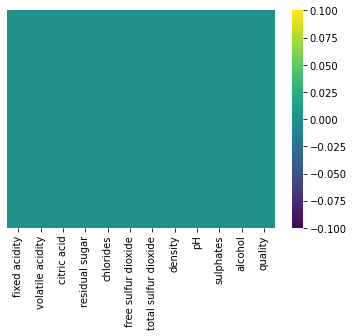

In [98]:
sns.heatmap(wd.isna(),cmap='viridis',yticklabels=False)

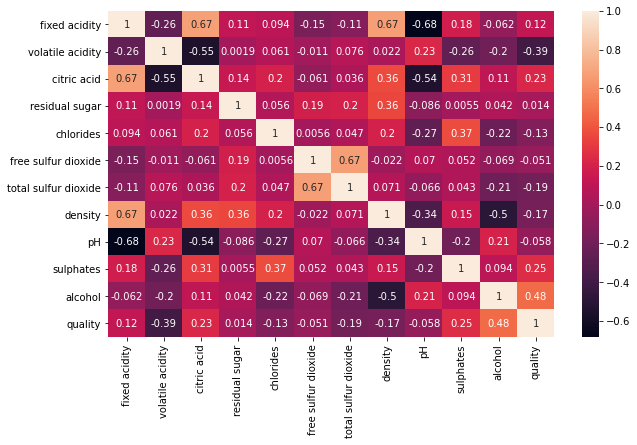

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(wd.corr(),annot=True)
plt.show()

In [100]:
wd.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [101]:
for x in wd.columns:
    if abs(wd.loc[:,x].skew())>0.55:
        wd.loc[:,x],_=boxcox(wd.loc[:,x])

In [102]:
wd.skew()

fixed acidity           0.000517
volatile acidity        0.000596
citric acid             0.318337
residual sugar         -0.095930
chlorides              -0.499643
free sulfur dioxide    -0.019778
total sulfur dioxide   -0.008028
density                 0.071288
pH                      0.193683
sulphates              -0.024779
alcohol                 0.109367
quality                 0.217802
dtype: float64

In [103]:
wd.shape

(1599, 12)

In [118]:
zs=zscore(wd)
wd=wd[(zs<3).all(axis=1)]

In [119]:
wd.shape

(1530, 12)

In [106]:
sc=StandardScaler()
wd_scale=sc.fit_transform(wd)

In [107]:
wd=pd.DataFrame(data=wd_scale,columns=wd.columns)

In [108]:
wd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.445656,1.005676,-1.392826,-0.593091,-0.114876,-0.258283,-0.108117,0.594559,1.349373,-0.548274,-1.098867,-0.801401
1,-0.160397,1.803993,-1.392826,0.552107,0.813942,0.995918,0.874881,0.044693,-0.792128,0.444501,-0.517402,-0.801401
2,-0.160397,1.284197,-1.183662,0.154132,0.593111,0.198069,0.558613,0.154666,-0.377644,0.231700,-0.517402,-0.801401
3,1.550461,-1.550352,1.535468,-0.593091,-0.166291,0.388125,0.712659,0.704532,-1.068451,-0.353362,-0.517402,0.442097
4,-0.445656,1.005676,-1.392826,-0.593091,-0.114876,-0.258283,-0.108117,0.594559,1.349373,-0.548274,-1.098867,-0.801401


In [109]:
wd.skew()

fixed acidity           0.057178
volatile acidity       -0.078957
citric acid             0.300611
residual sugar         -0.128374
chlorides              -1.805567
free sulfur dioxide    -0.022813
total sulfur dioxide   -0.018008
density                -0.119062
pH                      0.080034
sulphates              -0.172476
alcohol                 0.104859
quality                 0.244585
dtype: float64

In [120]:
wd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.445656,1.005676,-1.392826,-0.593091,-0.114876,-0.258283,-0.108117,0.594559,1.349373,-0.548274,-1.098867,-0.801401
1,-0.160397,1.803993,-1.392826,0.552107,0.813942,0.995918,0.874881,0.044693,-0.792128,0.444501,-0.517402,-0.801401
2,-0.160397,1.284197,-1.183662,0.154132,0.593111,0.198069,0.558613,0.154666,-0.377644,0.231700,-0.517402,-0.801401
3,1.550461,-1.550352,1.535468,-0.593091,-0.166291,0.388125,0.712659,0.704532,-1.068451,-0.353362,-0.517402,0.442097
4,-0.445656,1.005676,-1.392826,-0.593091,-0.114876,-0.258283,-0.108117,0.594559,1.349373,-0.548274,-1.098867,-0.801401


In [121]:
X=wd.drop('quality',axis=1)
y=wd['quality']

In [122]:
def model_select (model):
    maxscore=0
    maxrandomstate=0
    for x in range (42,102):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train.values.ravel())
        mdpredict=md.predict(X_test)
        r2score=r2_score(y_test,mdpredict)
        #print("R2 score for random state {b} is {c}".format(b=x,c=r2score))
        
        if r2score>maxscore:
            maxscore=r2score
            maxrandomstate=x
    #print()
    print("Best score is {} at random state {}".format(maxscore,maxrandomstate))

In [124]:
model_select(LinearRegression)

Best score is 0.433736841191975 at random state 54


In [127]:
model_select(KernelRidge)

Best score is 0.4336570352029139 at random state 54


In [129]:
model_select(AdaBoostRegressor)

Best score is 0.4279440386858504 at random state 73


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=54)

In [136]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)

In [138]:
MSE=mean_squared_error(y_test,lr_predict)

In [139]:
MSE

0.6481390778728421

In [140]:
joblib.dump(lr,'lr_winequality.joblib')

['lr_winequality.joblib']